Time Series Analysis on Stock Prices

Import Libraries:

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

Load the Dataset:

In [3]:
df = pd.read_csv("2) Stock Prices Data Set.csv")
df.head()

,symbol,date,open,high,low,close,volume
0,AAL,2014-01-02,25.0700,25.8200,25.0600,25.3600,8998943
1,AAPL,2014-01-02,79.3828,79.5756,78.8601,79.0185,58791957
2,AAP,2014-01-02,110.3600,111.8800,109.2900,109.7400,542711
3,ABBV,2014-01-02,52.1200,52.3300,51.5200,51.9800,4569061
4,ABC,2014-01-02,70.1100,70.2300,69.4800,69.8900,1148391


Convert the Date Column and Set Index:

In [45]:
import pandas as pd

# Load full data
df = pd.read_csv("2) Stock Prices Data Set.csv")

# Reduce to 365 rows for 1 year
df = df.head(365)

# Create a fake daily date range
df['Date'] = pd.date_range(start='2023-01-01', periods=365, freq='D')

# Set Date as index
df = df.sort_values('Date')
df.set_index('Date', inplace=True)

# View result
print(df.head())


           symbol        date      open      high       low     close  \
Date                                                                    
2023-01-01    AAL  2014-01-02   25.0700   25.8200   25.0600   25.3600   
2023-01-02   AAPL  2014-01-02   79.3828   79.5756   78.8601   79.0185   
2023-01-03    AAP  2014-01-02  110.3600  111.8800  109.2900  109.7400   
2023-01-04   ABBV  2014-01-02   52.1200   52.3300   51.5200   51.9800   
2023-01-05    ABC  2014-01-02   70.1100   70.2300   69.4800   69.8900   

              volume  
Date                  
2023-01-01   8998943  
2023-01-02  58791957  
2023-01-03    542711  
2023-01-04   4569061  
2023-01-05   1148391  


Plot the Stock Closing Price:

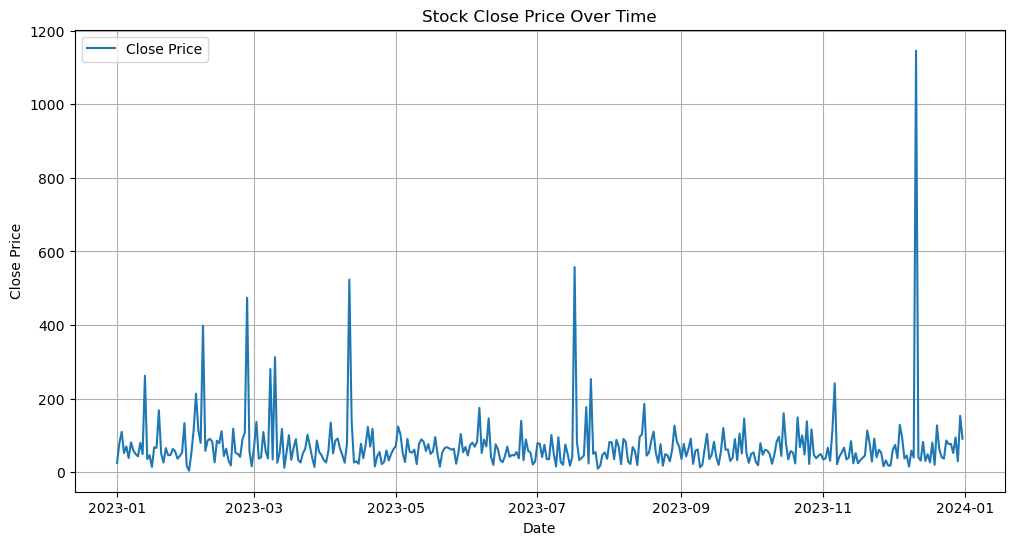

In [47]:
plt.figure(figsize=(12, 6))
plt.plot(df['close'], label='Close Price') 
plt.title('Stock Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()

Time Series Decomposition

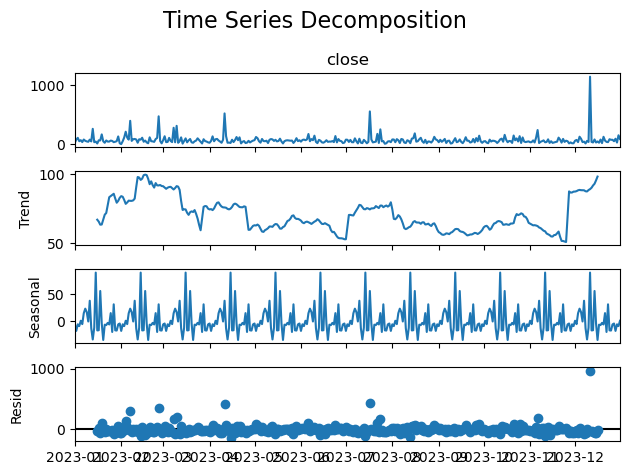

In [48]:
decomposition = seasonal_decompose(df['close'], model='additive', period=30)
decomposition.plot()
plt.suptitle("Time Series Decomposition", fontsize=16)
plt.tight_layout()
plt.show()

Moving Average Smoothing

In [55]:
df['MA_7'] = df['close'].rolling(window=7).mean()
df['MA_30'] = df['close'].rolling(window=30).mean()
print(df[['close', 'MA_7', 'MA_30']].head(10))
print(df[['close', 'MA_7', 'MA_30']].tail(10))

               close       MA_7  MA_30
Date                                  
2023-01-01   25.3600        NaN    NaN
2023-01-02   79.0185        NaN    NaN
2023-01-03  109.7400        NaN    NaN
2023-01-04   51.9800        NaN    NaN
2023-01-05   69.8900        NaN    NaN
2023-01-06   38.2300        NaN    NaN
2023-01-07   81.1300  65.049786    NaN
2023-01-08   59.2900  69.896929    NaN
2023-01-09   49.2800  65.648571    NaN
2023-01-10   42.9900  56.112857    NaN
             close       MA_7      MA_30
Date                                    
2023-12-22   40.94  58.198571  88.599000
2023-12-23   36.91  56.525714  86.785667
2023-12-24   86.02  64.997143  88.305667
2023-12-25   76.60  64.434286  88.829333
2023-12-26   76.87  72.547143  89.634000
2023-12-27   52.05  61.805714  90.840333
2023-12-28   94.47  66.265714  92.916667
2023-12-29   29.65  64.652857  93.306667
2023-12-30  153.10  81.251429  97.813667
2023-12-31   90.76  81.928571  98.799667


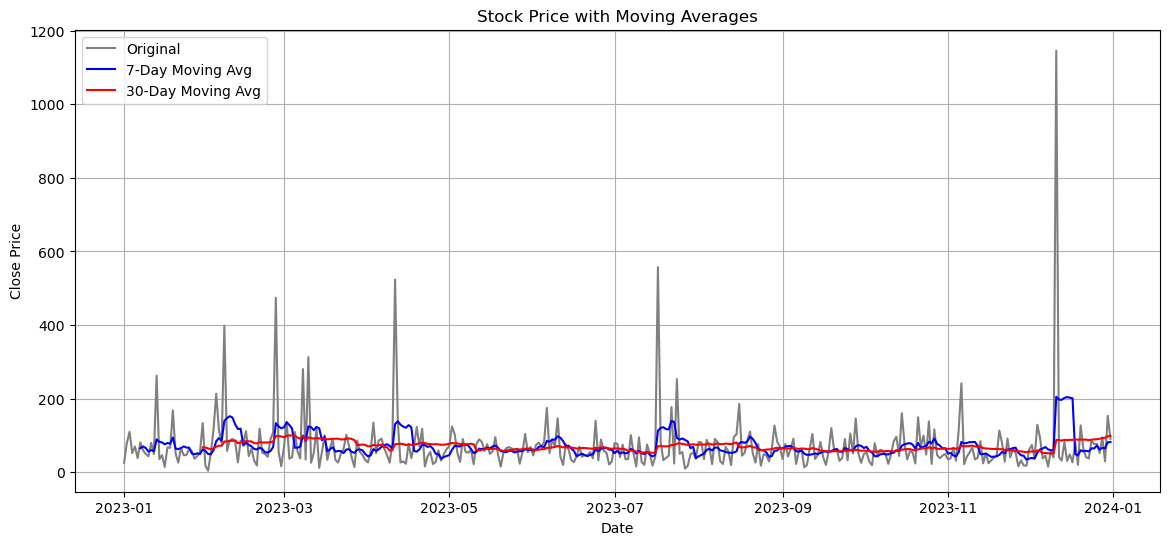

In [56]:
plt.figure(figsize=(14, 6))
plt.plot(df['close'], label='Original', color='gray')
plt.plot(df['MA_7'], label='7-Day Moving Avg', color='blue')
plt.plot(df['MA_30'], label='30-Day Moving Avg', color='red')
plt.title('Stock Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()